In [1]:
# Import dstools (absolute path required, please change to your systems settings)
import importlib
import sys

path = '/dstools-master/dstools/__init__.py'
name = 'dstools'

spec = importlib.util.spec_from_file_location(name, path)
module = importlib.util.module_from_spec(spec)
sys.modules[spec.name] = module
spec.loader.exec_module(module)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from dstools.datasets import bodyfat

In [3]:
df = bodyfat()
df.convert(unit="metric")
X, y = df.for_regression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=147, test_size = 0.2, shuffle=True)

D:\dstools-master/dstools\datasets\bodyfat.py:89: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['Weight', 'Height']] = df[['Weight', 'Height']].applymap(lambda x: round(x, 2))
D:\dstools-master/dstools\datasets\bodyfat.py:90: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[to_convert] = df[to_convert].applymap(lambda x: round(x * 0.39370, 2))
D:\dstools-master/dstools\datasets\bodyfat.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[weights] = df[weights].applymap(lambda x: round(x * 0.45359237, 2))
D:\dstools-master/dstools\datasets\bodyfat.py:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[lengths] = df[lengths].applymap(lambda x: round(x / 0.39370, 2))


In [4]:
# Linear Regression for comparison
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

## Ridge Regression

In [5]:
ridge = Ridge(alpha=1000)
ridge.fit(X_train, y_train)
X_pred = ridge.predict(X_test)

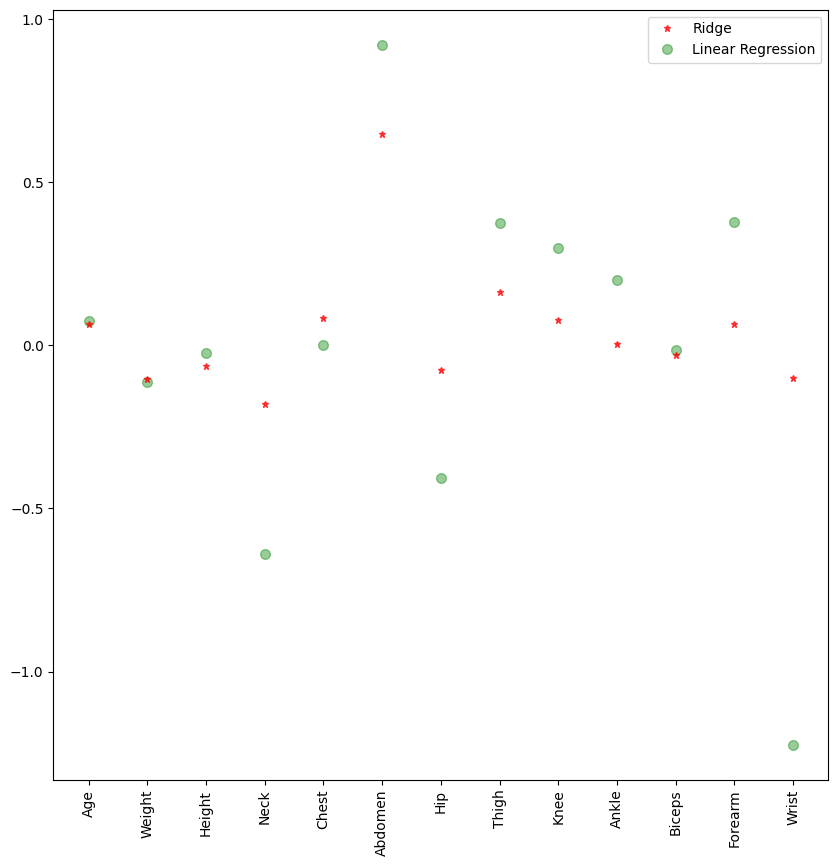

In [6]:
plt.figure(figsize = (10, 10))
plt.plot(X.columns,ridge.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge',zorder=7)
plt.plot(X.columns,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [7]:
rcv = RidgeCV()
rcv.fit(X_train, y_train)
rcv.alpha_

np.float64(10.0)

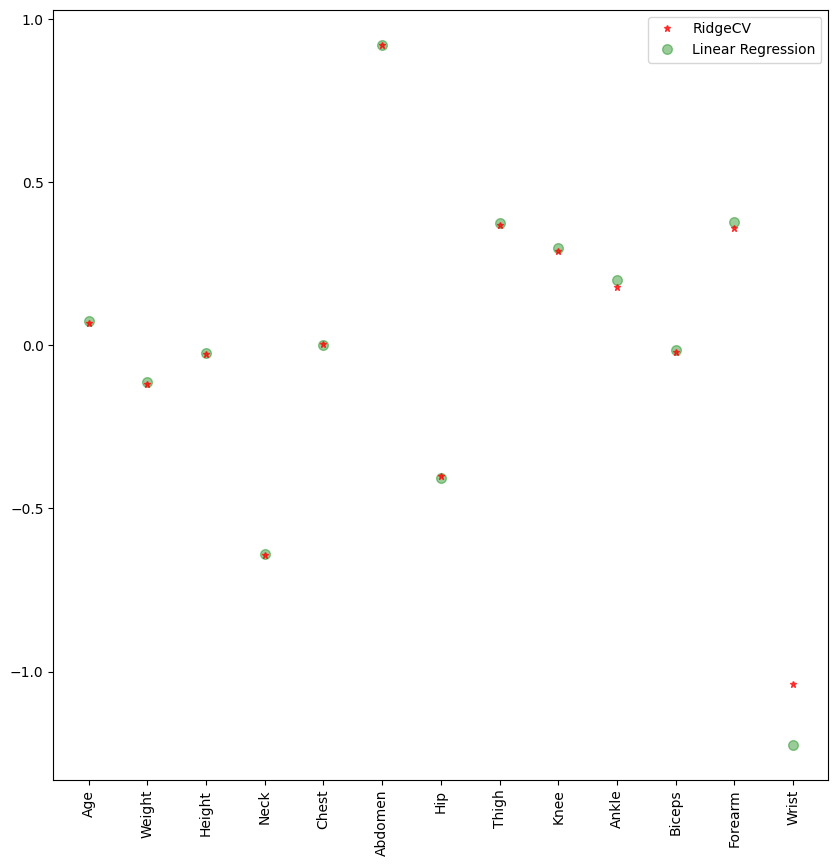

In [8]:
plt.figure(figsize = (10, 10))
plt.plot(X.columns,rcv.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'RidgeCV',zorder=7)
plt.plot(X.columns,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

## Lasso

In [9]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

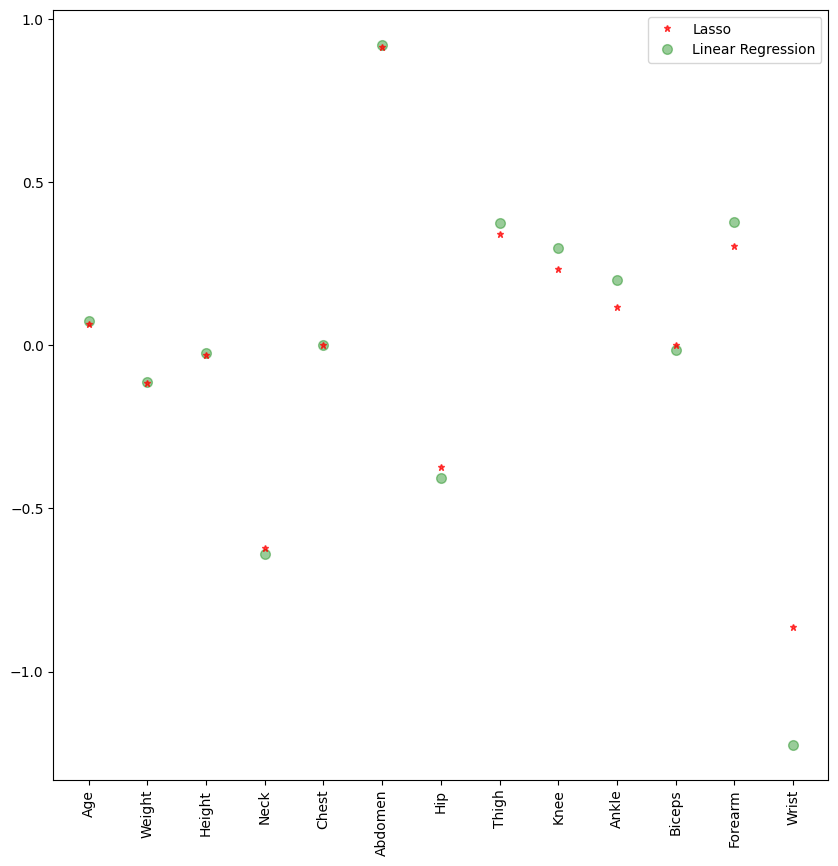

In [10]:
plt.figure(figsize = (10, 10))
plt.plot(X.columns,lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso',zorder=7)
plt.plot(X.columns,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [11]:
lcv = LassoCV()
lcv.fit(X_train, y_train)
lcv.alpha_

np.float64(0.068051471003193)

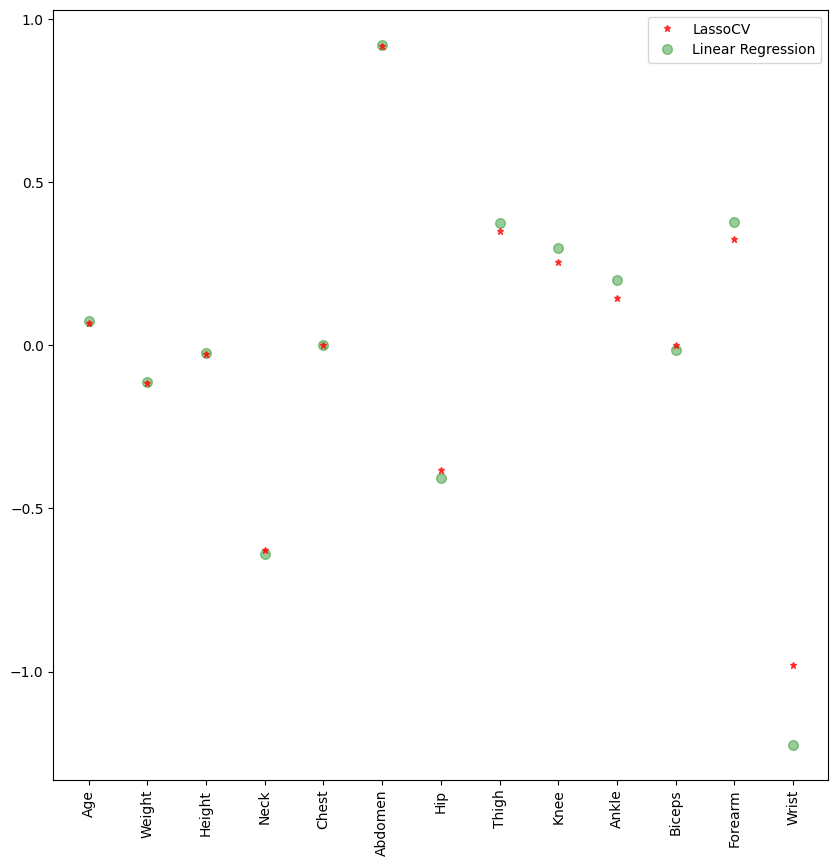

In [12]:
plt.figure(figsize = (10, 10))
plt.plot(X.columns,lcv.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'LassoCV',zorder=7)
plt.plot(X.columns,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

## Elastic Net

In [13]:
en = ElasticNet(alpha=10)
en.fit(X_train, y_train)

ElasticNet(alpha=10)

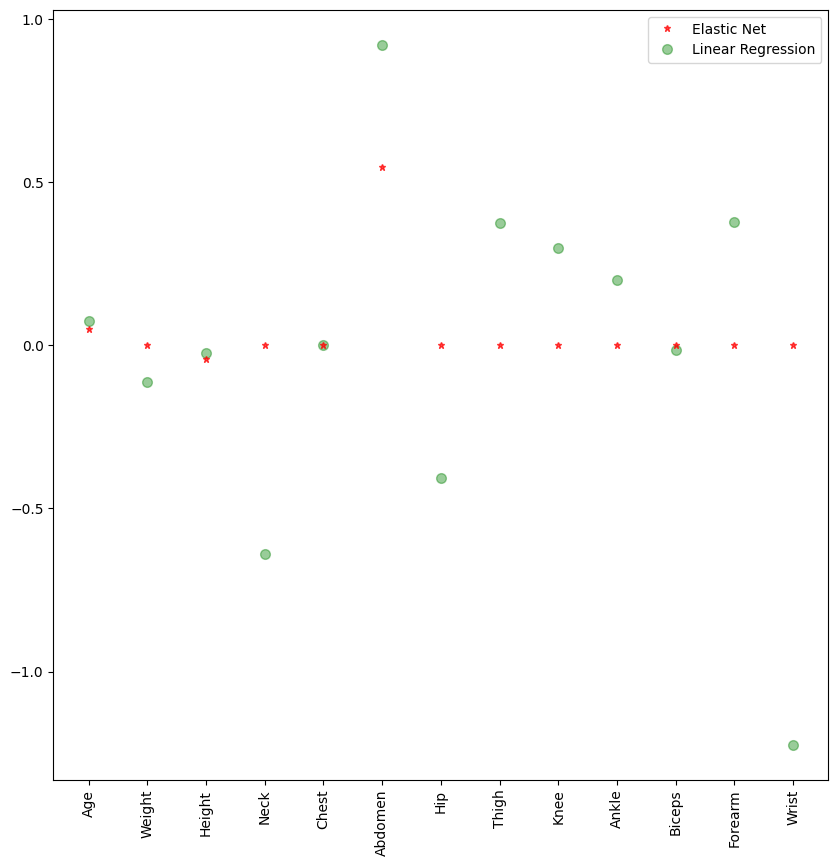

In [14]:
plt.figure(figsize = (10, 10))
plt.plot(X.columns,en.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Elastic Net',zorder=7)
plt.plot(X.columns,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()